In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
df=pd.read_csv("Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.shape

(6362620, 11)

In [14]:
#Calculating the fraud percentage
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

In [16]:
#Class imbalance check
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

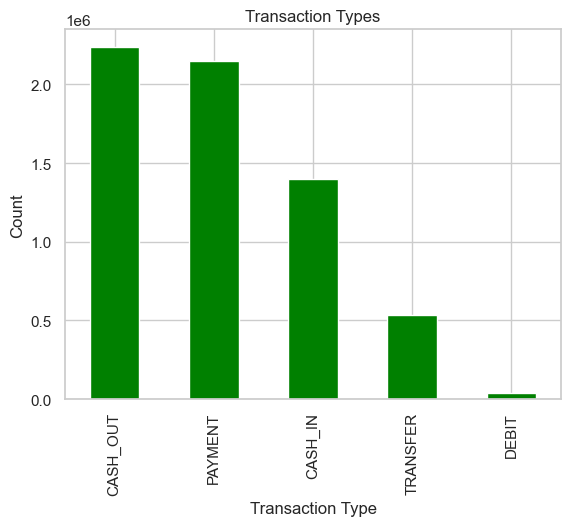

In [17]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types",color="green")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

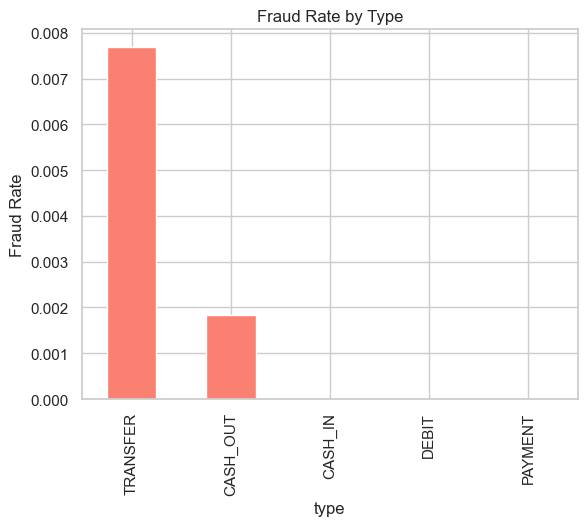

In [20]:
#finding fraud rates
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [22]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

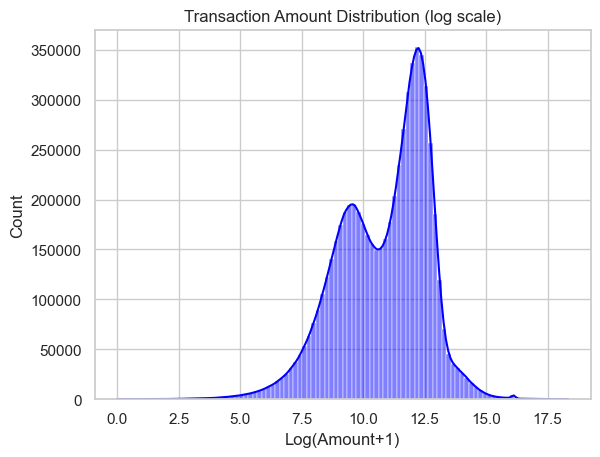

In [25]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True,color="blue")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

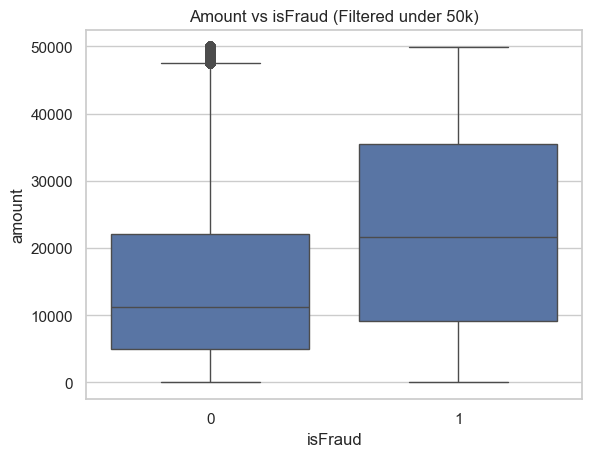

In [26]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [29]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [30]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [31]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [32]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28


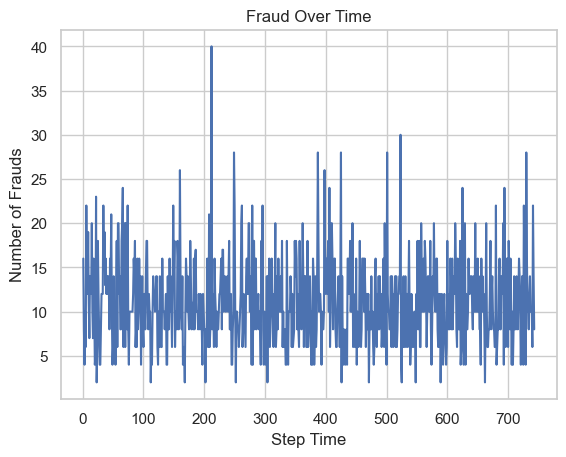

In [36]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Fraund per Step")
plt.xlabel("Step Time")
plt.ylabel("Number of Frauds")
plt.title("Fraud Over Time")
plt.grid(True)
plt.show()

In [37]:
df.drop(columns="step",inplace=True)

In [38]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,181.00
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,181.00
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,11668.14


In [39]:
top_senders=df["nameOrig"].value_counts().head(10)

In [40]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [43]:
top_receivers=df["nameDest"].value_counts().head(10)

In [44]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [45]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [46]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [47]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [49]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

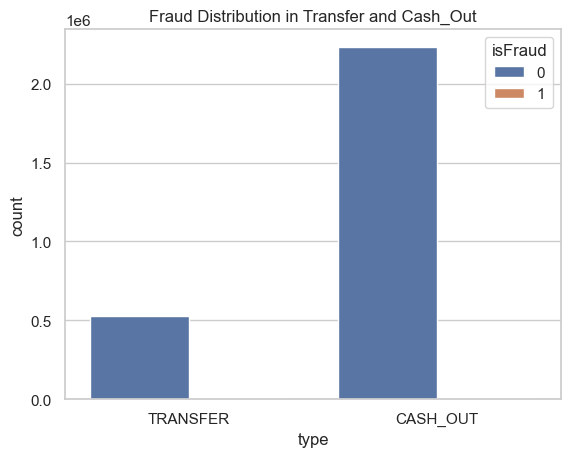

In [51]:
sns.countplot(data=fraud_types,x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash_Out")
plt.show()

In [54]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [55]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


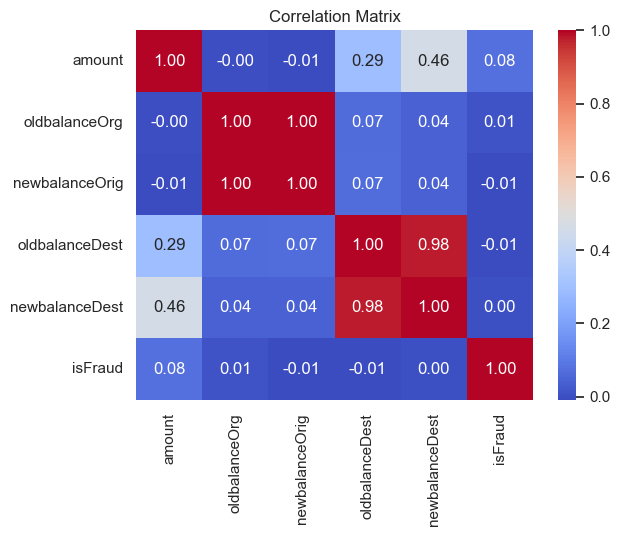

In [56]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [60]:
zero_after_transfer=df[
(df["oldbalanceOrg"]>0) &
(df["newbalanceOrig"]==0) &
(df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [62]:
len(zero_after_transfer)

1188074

In [63]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,181.0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,181.0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,15325.0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,705.0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,10835.0


In [64]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [66]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,181.00
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,181.00
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,11668.14


In [67]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [70]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,9839.64
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,1864.28
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,181.00
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,181.00
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,11668.14


In [71]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [72]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [74]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balaceDiffOrig,balanceDiffDest,balanceDiffOrig
3891047,PAYMENT,316.07,21263.00,20946.93,0.00,0.00,316.07,0.00,316.07
4887459,CASH_OUT,5350.19,0.00,0.00,2146810.07,2152160.26,0.00,5350.19,0.00
853790,PAYMENT,7748.26,1545.00,0.00,0.00,0.00,1545.00,0.00,1545.00
5795812,CASH_IN,309737.13,7709225.51,8018962.64,3761818.30,3452081.17,-309737.13,-309737.13,-309737.13
5734759,PAYMENT,16306.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
5859737,CASH_IN,203259.30,3024731.64,3227990.94,407992.80,204733.50,-203259.30,-203259.30,-203259.30
5506061,PAYMENT,34514.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4043713,CASH_OUT,241543.19,4156.00,0.00,40263.22,281806.41,4156.00,241543.19,4156.00
4069668,PAYMENT,15693.51,52745.28,37051.77,0.00,0.00,15693.51,0.00,15693.51


In [76]:
preprocessor=ColumnTransformer(
  transformers=[
      ("num",StandardScaler(),numeric),
      ("cat",OneHotEncoder(drop="first"),categorical)
  ],
    remainder="drop"
    
)


In [78]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
]
)


In [79]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [80]:
y_pred=pipeline.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [83]:
confusion_matrix(y_test,y_pred)

array([[1802455,  103867],
       [    149,    2315]])

In [84]:
pipeline.score(X_test,y_test)

0.9455067252169703

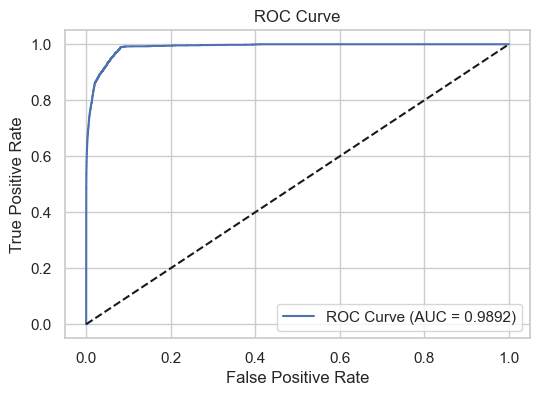

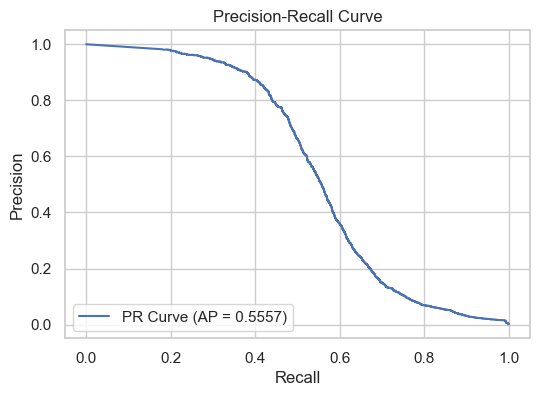

In [86]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get predicted probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


In [85]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

Top positive predictors of Fraud:
          Feature  Coefficient
8   type_TRANSFER    73.832014
5   type_CASH_OUT    72.220631
1   oldbalanceOrg    66.388472
3  oldbalanceDest    31.713135
0          amount    -1.334686
6      type_DEBIT    -3.882661
4  newbalanceDest   -34.387346
2  newbalanceOrig   -63.497508
7    type_PAYMENT   -89.780053

Top negative predictors (reduce fraud likelihood):
          Feature  Coefficient
8   type_TRANSFER    73.832014
5   type_CASH_OUT    72.220631
1   oldbalanceOrg    66.388472
3  oldbalanceDest    31.713135
0          amount    -1.334686
6      type_DEBIT    -3.882661
4  newbalanceDest   -34.387346
2  newbalanceOrig   -63.497508
7    type_PAYMENT   -89.780053


<Figure size 800x600 with 0 Axes>

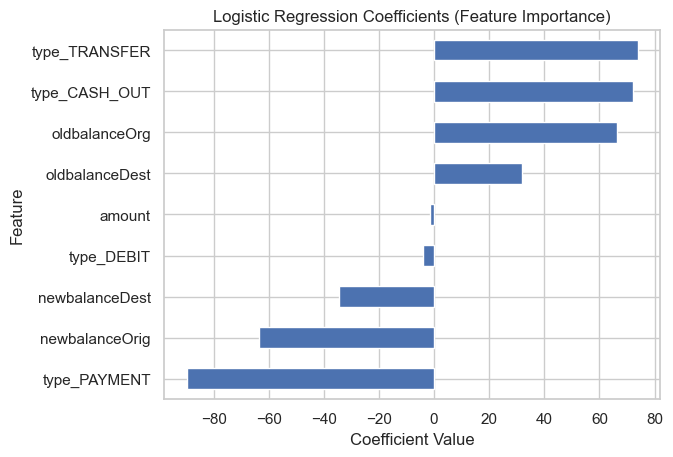

In [87]:
# Extract feature names after preprocessing
feature_names = (
    pipeline.named_steps["prep"]
    .transformers_[0][2] +  # numeric features
    list(pipeline.named_steps["prep"].transformers_[1][1]
         .get_feature_names_out(["type"]))  # categorical features
)

# Get model coefficients
coefficients = pipeline.named_steps["clf"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print("Top positive predictors of Fraud:")
print(coef_df.head(10))
print("\nTop negative predictors (reduce fraud likelihood):")
print(coef_df.tail(10))

# Plot coefficients
plt.figure(figsize=(8,6))
coef_df.set_index("Feature").sort_values(by="Coefficient").plot.barh(legend=False)
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.xlabel("Coefficient Value")
plt.show()
